# Spotify Music Analysis & Machine Learning

This project analyzes the most streamed songs on Spotify in 2023 using Python and Machine Learning techniques. The goal is to explore the trends, visualize key insights, and predict future streaming trends based on various musical attributes like danceability, energy, and more.
# 🔍 **Key Insights**
1. **Top Streamed Songs**: 
   - The top 10 most streamed songs were visualized, with *Cruel Summer* by Taylor Swift leading the list.
2. **Trends in Release Years**: 
   - Songs from 2019 continue to dominate the charts, ence of many new releases in 2023.
3. **Machine Learning Predictions**: 
   - A linear regression model was built to predict future streams based on track attributes like danceability, energy, and playlist presence. The model achieved a **Root Mean Squared Error** of 295 million strms.

## 💻 **Technologies Used**
- **Python**
- **Pandas** for data cleaning and manipulation
- **Matplotlib** for data visualization
- **Scikit-learn** for building rnthe machine leaing model

## 📊 **Data Analysis**
The dataset provides detailed information about the most streamed Spotify songs, including:
- Track name and artist(s)
- Release date
- Number of streams
- Musical attributes (danceability, energy, valence, etc.)
- Presence in playlists and charts

### **Visualizations**:
1. **Top 10 Most Streamed Songs**: Bar chart of the most popular tracks.
2. **Streaming Trends by Release Year**: Line chart showing how total streams change with the release year.
3. **Musical Attributes vs. Streams**:
   - Danceability, energy, and valence plotted against streaming numbers to uncoveotential correlations.

## 🤖 **Machine Learning**
A linear regression model was used to predict future streams based on:
- Release year
- Danceability
- Energy
- Valence (happiness)
- Presence in playlists

The model was evaluated with a **Root Mean Squared Error (RMSE)** of 295 million streams, giving a reasonable pcom/your-username/Spotify-Music-Analysis.git


In [1]:
import pandas as pd
spotify_data = pd.read_csv('spotify_songs_2023.csv', encoding='ISO-8859-1')
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [2]:


# Load the dataset
file_path = 'spotify_songs_2023.csv'  # Adjust the path if needed
spotify_data = pd.read_csv(file_path)

# Step 1: Convert necessary columns to numeric values
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data['danceability_%'] = pd.to_numeric(spotify_data['danceability_%'], errors='coerce')
spotify_data['energy_%'] = pd.to_numeric(spotify_data['energy_%'], errors='coerce')
spotify_data['valence_%'] = pd.to_numeric(spotify_data['valence_%'], errors='coerce')

# Step 2: Drop rows with missing values
spotify_data_cleaned = spotify_data.dropna()

# Step 3: Display the first few rows of the cleaned data
print(spotify_data_cleaned.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  key   mode  \
0                147  141381703.0               

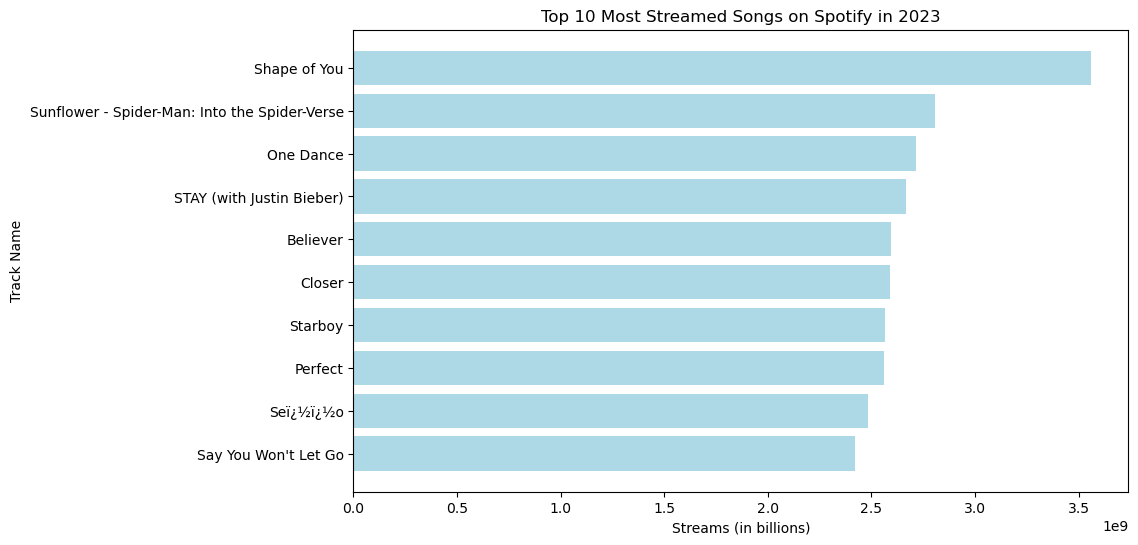

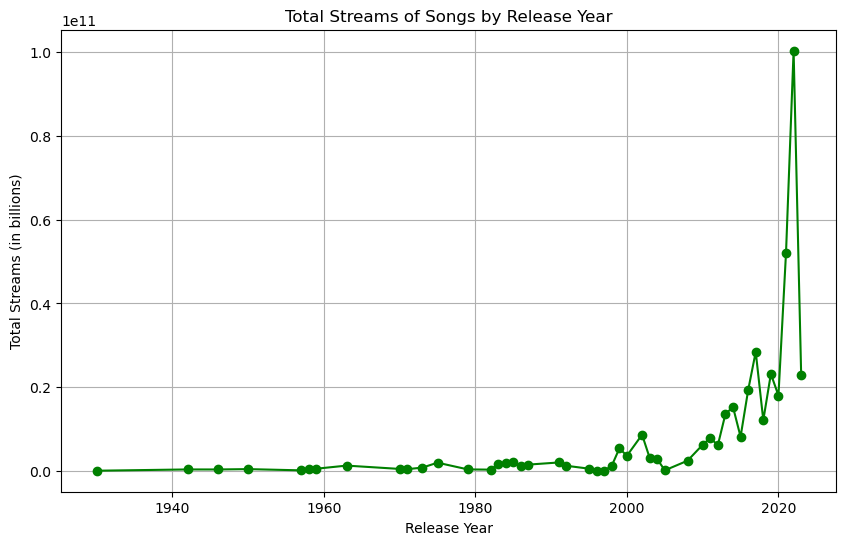

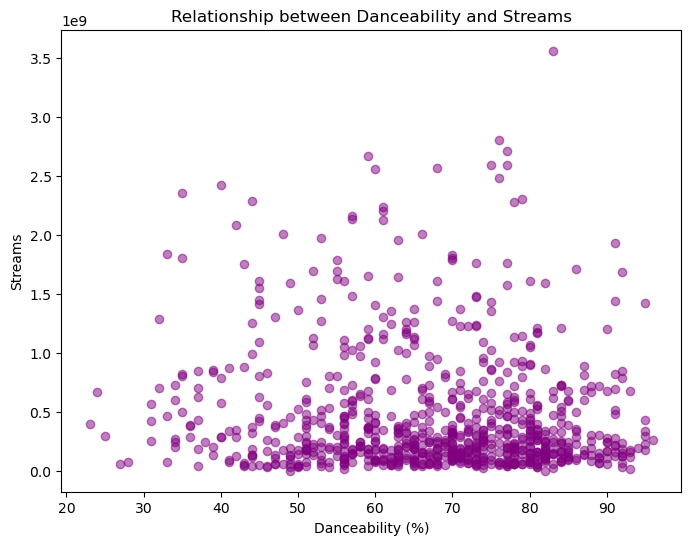

In [3]:
import matplotlib.pyplot as plt
# 1. Visualization of most streamed songs
plt.figure(figsize=(10, 6))
top_songs = spotify_data_cleaned.nlargest(10, 'streams')
plt.barh(top_songs['track_name'], top_songs['streams'], color='lightblue')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Most Streamed Songs on Spotify in 2023')
plt.gca().invert_yaxis()
plt.show()

# 2. Streaming Trends by Release Year
plt.figure(figsize=(10, 6))
release_year_trends = spotify_data_cleaned.groupby('released_year')['streams'].sum().reset_index()
plt.plot(release_year_trends['released_year'], release_year_trends['streams'], marker='o', linestyle='-', color='green')
plt.xlabel('Release Year')
plt.ylabel('Total Streams (in billions)')
plt.title('Total Streams of Songs by Release Year')
plt.grid(True)
plt.show()

# 3. Scatter plot of Danceability vs Streams
plt.figure(figsize=(8, 6))
plt.scatter(spotify_data_cleaned['danceability_%'], spotify_data_cleaned['streams'], alpha=0.5, color='purple')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.title('Relationship between Danceability and Streams')
plt.show()

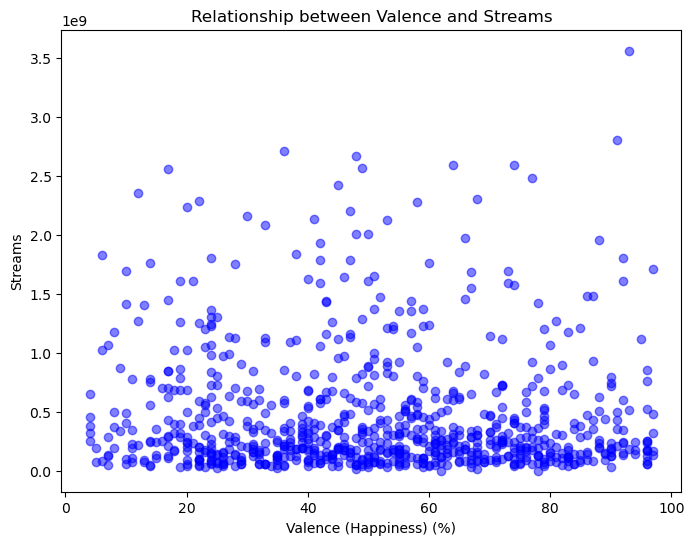

In [4]:
# Scatter plot of Valence (Happiness) vs Streams
plt.figure(figsize=(8, 6))
plt.scatter(spotify_data_cleaned['valence_%'], spotify_data_cleaned['streams'], alpha=0.5, color='blue')
plt.xlabel('Valence (Happiness) (%)')
plt.ylabel('Streams')
plt.title('Relationship between Valence and Streams')
plt.show()

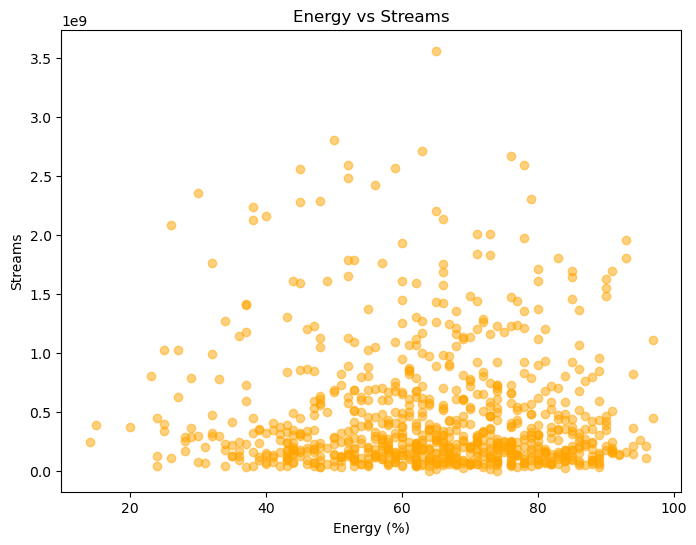

In [5]:
# Scatter plot for Energy vs Streams
plt.figure(figsize=(8, 6))
plt.scatter(spotify_data_cleaned['energy_%'], spotify_data_cleaned['streams'], alpha=0.5, color='orange')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.title('Energy vs Streams')
plt.show()


### Analyzing Multiple Attributes Together (e.g., Danceability, Energy, and Streams):
We can use a correlation matrix to understand relationships between multiple attributes:

In [6]:
# Calculate correlation matrix
correlation_matrix = spotify_data_cleaned[['streams', 'danceability_%', 'energy_%', 'valence_%']].corr()

# Display the correlation matrix
print(correlation_matrix)


                 streams  danceability_%  energy_%  valence_%
streams         1.000000       -0.093268 -0.036499  -0.051014
danceability_% -0.093268        1.000000  0.158418   0.391414
energy_%       -0.036499        0.158418  1.000000   0.349616
valence_%      -0.051014        0.391414  0.349616   1.000000


### Machine Learning Model
- To build a predictive machine learning model to forecast streaming success based on attributes like danceability and energy, we'll use the Linear Regression model. Below is a breakdown of how to proceed:

## Steps: ##
1- Select Features and Target: We'll use features like danceability and energy to predict streams (target).
2- Split the Data: Divide the dataset into training and test sets.
3- Train the Model: Use the training set to build the linear regression model.
4- Make Predictions: Use the test set to evaluate the model's performance.
5- Evaluate the Model: Measure the model's accuracy using metrics like Root Mean Squared Error (RMSE).
##  Code to Build the Model:

In [7]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Step 1: Select features (danceability, energy) and target (streams)
features = spotify_data_cleaned[['danceability_%', 'energy_%']]
target = spotify_data_cleaned['streams']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 551240753.7692721


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# Select additional features to include in the model
features = spotify_data_cleaned[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]  # Add more features
target = spotify_data_cleaned['streams']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 550501303.6935112


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Use More Complex Models:
Linear regression is a simple model. For more complex relationships between variables, you can try advanced machine learning models such as:

### Random Forest Regression
### Gradient Boosting Regression
### Support Vector Machines (SVM)


### 1- Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions and calculate RMSE
y_pred_rf = model_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 571912567.7244023


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2- Gradient Boosting Regression

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Select features (danceability, energy) and target (streams)
features = spotify_data_cleaned[['danceability_%', 'energy_%']]
target = spotify_data_cleaned['streams']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regression
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"Gradient Boosting RMSE: {rmse_gb}")



Gradient Boosting RMSE: 567670235.7988477


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 3- Support Vector Machine (SVM)

In [11]:
# Support Vector Machine (SVM) Regression
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print(f"SVM RMSE: {rmse_svr}")


SVM RMSE: 607364183.7555151


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Scaling the Data:
Some models perform better when the data is normalized or scaled. You can scale the features using StandardScaler to give them the same scale before training the model.

In [12]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the model with scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse_scaled = mean_squared_error(y_test, y_pred, squared=False)
print(f"Scaled Data RMSE: {rmse_scaled}")


Scaled Data RMSE: 551240753.7692721


C:\Users\Family\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Cross-Validation:
We can use cross-validation to ensure that your model’s performance is consistent across different subsets of the data.

In [13]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=5)
rmse_cv = (-cv_scores.mean()) ** 0.5
print(f"Cross-Validated RMSE: {rmse_cv}")


Cross-Validated RMSE: 537094259.0509207


## Evaluate Feature Importance:
For models like Random Forest, you can see which features are most important for predicting streams. This can help you focus on improving or removing less important features.

In [14]:
# Feature importance in Random Forest
importances = model_rf.feature_importances_
for feature, importance in zip(features.columns, importances):
    print(f'{feature}: {importance}')


danceability_%: 0.24077440661705463
energy_%: 0.22796018856090022
